In [138]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score , confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [139]:
final_data = pd.read_csv('C:\\Users\\MR\\Documents\\Heart_Disease_Project\\data\\feature_selection_preprocessed_data.csv')
final_data

,PC1,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,condition
0,-0.039233,1.108265,-0.700899,0.301111,0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796,0
1,-1.141627,0.032225,0.344283,0.196894,0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075,1
2,-1.868282,0.121233,0.142862,0.052773,-0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274,1
3,0.902116,-0.081043,-0.617978,0.342487,0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965,0
4,1.298818,0.268812,0.469796,0.341791,-0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,-0.271537,-1.102780,0.547618,-0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663,1
299,-0.986426,-0.198322,-0.710955,-0.726882,0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050,1
300,-1.604664,-0.672151,0.089254,-0.446223,-0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046,1
301,0.398393,-0.178727,-0.341713,-0.655132,-0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055,1


In [140]:
x = final_data.drop(columns=['condition'])
y_true = final_data['condition']
x

,PC1,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.039233,1.108265,-0.700899,0.301111,0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796
1,-1.141627,0.032225,0.344283,0.196894,0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075
2,-1.868282,0.121233,0.142862,0.052773,-0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274
3,0.902116,-0.081043,-0.617978,0.342487,0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965
4,1.298818,0.268812,0.469796,0.341791,-0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,-0.271537,-1.102780,0.547618,-0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663
299,-0.986426,-0.198322,-0.710955,-0.726882,0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050
300,-1.604664,-0.672151,0.089254,-0.446223,-0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046
301,0.398393,-0.178727,-0.341713,-0.655132,-0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055


In [141]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(x)
pca_x = pd.DataFrame(pca_x, columns=['PC1', 'PC2'])

In [142]:
def cluster_accuracy(y_true, y_pred):
    labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    cost_matrix = np.zeros((len(labels), len(pred_labels)))
    for i, true_label in enumerate(labels):
        for j, pred_label in enumerate(pred_labels):
            cost_matrix[i, j] = -np.sum((y_true == true_label) & (y_pred == pred_label))
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    mapping = dict(zip(col_ind, row_ind))
    y_aligned = np.array([mapping[label] for label in y_pred])
    return accuracy_score(y_true, y_aligned)

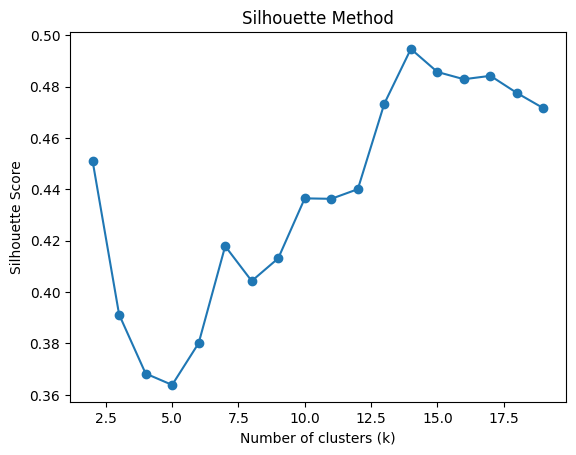

In [143]:
scores = []
for k in range(2, 20): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_x)
    score = silhouette_score(pca_x, labels)
    scores.append(score)
plt.plot(range(2, 20), scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

Labels: [ 2 12  5  1 11 11 13 14 10 10 13  1 10  8  8 11  8  1  7 11  4 11  8  2
  5 14  7  3  1  5  3 12 11 12  1  1  5  5  0 13 12  4  7 11  1 10 11 10
 11  6  7  4  2  6 12  5  4  2  2  2  9 13  5  7 12  5  8  2 10  1  7 12
  0  2  2 11  5 11  8 10 12 13  6 10 11  6  6 11  1 11  4  4  4 14 11 12
  5 12 11  6  6  6  8 11  4  8 12 10  0 12  0 10  2  0 13 13  6  3 10 10
 10 12 13 12  2  1 12  0 11  3  2  4  6  2 14  1 12 10  0  8  1 10 11 12
 10 11 10 11  6  7  4 13 13  5 10  4 12  2 10  8  8 10 14 13 11 12 11  8
 10 14 12 10  9 13 10  0  4  5 11  6 10  0  6  2  1  7  8 12  2 10 11  0
  5 13  1 12  2 13  7  6  1 14  8  3  8  5  5  5 11  9  7 12  8  0  8 10
  7 13  9  6  1 11  7  0  9  7  1  7 12 10  1  9  6  8  7 12 10  2 14 11
 11  7  3 13  7 13  4 12  4  6  0 12  0 11 13 14  3  3  6  8 14 11  7 11
 12  0 12  4  8 11 10  2  0 14  1 10  1 14  6 14  0 11  0 11  4  4  0 13
  2  1  2  7 12 10  9 11 10  9  4 12  0  1 11] 

Centers: [[-1.4241643  -0.74799254]
 [ 0.70810613 -0.10808465]
 [-0

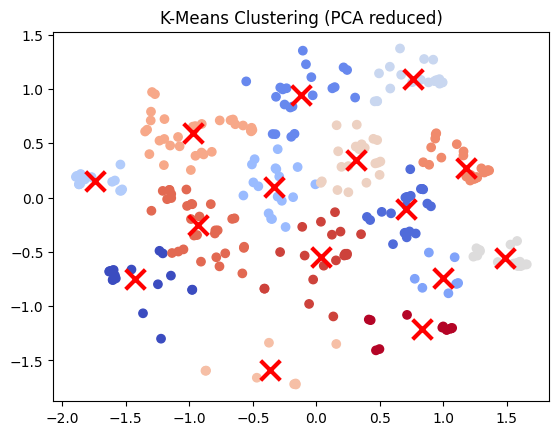

The average silhouette_score is: 0.4857546131095926
Adjusted Rand Index (ARI): 0.07496784656732151
Normalized Mutual Info (NMI): 0.19272574938076553


In [144]:
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(pca_x)
print('Labels:', kmeans.labels_, '\n')
print('Centers:', kmeans.cluster_centers_, '\n')
plt.scatter(pca_x['PC1'], pca_x['PC2'], c=kmeans.labels_, cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('K-Means Clustering (PCA reduced)')
plt.show()
silhouette_avg = silhouette_score(pca_x, kmeans.labels_)
print(f"The average silhouette_score is: {silhouette_avg}")
ARI = adjusted_rand_score(y_true, kmeans.labels_)
NMI = normalized_mutual_info_score(y_true, kmeans.labels_)
print("Adjusted Rand Index (ARI):", ARI)
print("Normalized Mutual Info (NMI):", NMI)

Labels: [1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0
 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1
 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1
 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 1 1] 

Centers: [[-0.91446849 -0.04186819]
 [ 0.80654985  0.03692722]] 



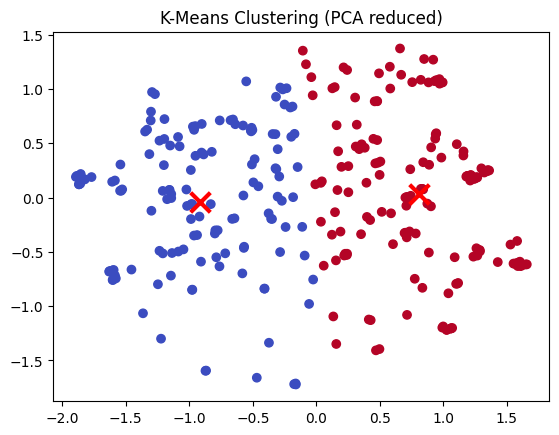

The average silhouette_score is: 0.4511483434675227
Adjusted Rand Index (ARI): 0.4208017156033619
Normalized Mutual Info (NMI): 0.3297121094687534
Clustering Accuracy (after alignment): 0.8250825082508251


In [145]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_x)
print('Labels:', kmeans.labels_, '\n')
print('Centers:', kmeans.cluster_centers_, '\n')
plt.scatter(pca_x['PC1'], pca_x['PC2'], c=kmeans.labels_, cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('K-Means Clustering (PCA reduced)')
plt.show()
silhouette_avg = silhouette_score(pca_x, kmeans.labels_)
print(f"The average silhouette_score is: {silhouette_avg}")
ari = adjusted_rand_score(y_true, kmeans.labels_)
nmi = normalized_mutual_info_score(y_true, kmeans.labels_)
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Info (NMI):", nmi)
acc = cluster_accuracy(y_true, kmeans.labels_)
print("Clustering Accuracy (after alignment):", acc)

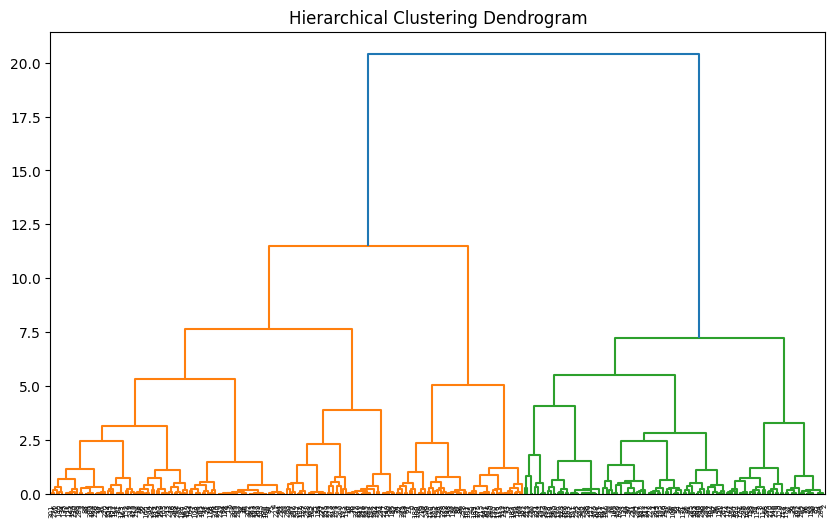


Confusion Matrix (before relabeling):
 [[146  18]
 [ 39 100]]

Hierarchical Clustering vs Target:
Target     0    1
Cluster          
0        146   39
1         18  100 

Adjusted Rand Index (ARI): 0.387
Adjusted Mutual Info (AMI): 0.306
Silhouette Score: 0.421


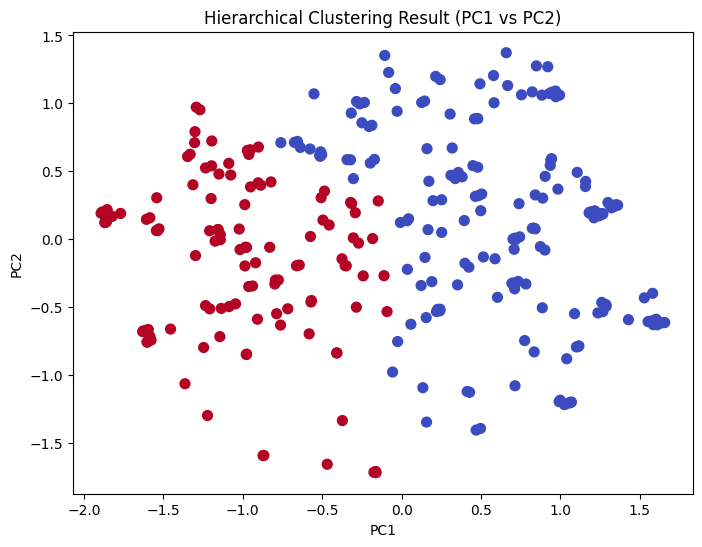

In [146]:
linked = linkage(pca_x, method="ward")
plt.figure(figsize=(10,6))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

hier = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
clusters_hier = hier.fit_predict(pca_x)

cm = confusion_matrix(y_true, clusters_hier)
print("\nConfusion Matrix (before relabeling):\n", cm)
if cm[0,0] + cm[1,1] < cm[0,1] + cm[1,0]:
    clusters_hier = 1 - clusters_hier 
pca_x["Cluster_Hierarchical"] = clusters_hier

crosstab_hier = pd.crosstab(pca_x["Cluster_Hierarchical"], y_true, rownames=["Cluster"], colnames=["Target"])
print("\nHierarchical Clustering vs Target:")
print(crosstab_hier, '\n')
ari = adjusted_rand_score(y_true, clusters_hier)
ami = adjusted_mutual_info_score(y_true, clusters_hier)
sil = silhouette_score(pca_x.drop("Cluster_Hierarchical", axis=1), clusters_hier)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Adjusted Mutual Info (AMI): {ami:.3f}")
print(f"Silhouette Score: {sil:.3f}")
plt.figure(figsize=(8,6))
plt.scatter(pca_x["PC1"], pca_x["PC2"], c=clusters_hier, cmap="coolwarm", s=50)
plt.title("Hierarchical Clustering Result (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [147]:
joblib.dump(kmeans, 'C:\\Users\\MR\\Documents\\Heart_Disease_Project\\models\\kmeans.pkl')
joblib.dump(hier, 'C:\\Users\\MR\\Documents\\Heart_Disease_Project\\models\\hier.pkl')

['C:\\Users\\MR\\Documents\\Heart_Disease_Project\\models\\hier.pkl']